In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from numpy import exp
from muse import *

In [2]:
#Spec = np.loadtxt('HE1108-2813_ASCII', unpack=False)
hdu = fits.open('HE0232-0900.wo_absorption.fits')
qso_data = hdu[0].data
qso_error = hdu[1].data
qso_header = hdu[0].header
wavestart = qso_header['CRVAL3']
wavint = qso_header['CD3_3']
wave = wavestart+np.arange(qso_data.shape[0])*wavint 

In [3]:
x = wave
y = qso_data[:,51,67] # I set the central position manual here, but one can also search for maximum light in principle
y_err = qso_error[:,51,67]

In [4]:
z = 0.043143
k = 1+z

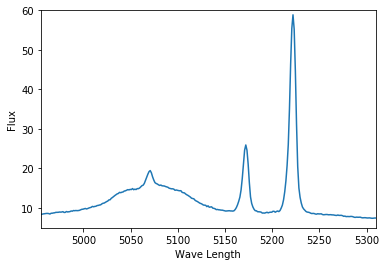

In [5]:
plt.xlim([4750*k,5090*k])
plt.ylim([5,60])
plt.xlabel('Wave Length')
plt.ylabel('Flux')
plt.plot(x,y)
plt.show()


In [6]:
select = (x>4750*k) & (x<5090*k)

In [7]:
from muse import *

In [13]:
popt_full_fit,pcov_full_fit = leastsq(full_gauss2,x0=[2,25,12942,50.0,2,25,12942,50.0,1,2,12842,100.0,5,1,12942,1000.0,5,1,12942,1000.0,-0.001,0.1],args=(x[select],y[select],y_err[select]),maxfev = 10000000)                                                    
print(popt_full_fit)

#it is easier to store the output values into readiable names for further processing. 
#(amp_Hb_fit,amp_OIII5007_fit,vel_OIII_fit,vel_sigma_OIII_fit,amp_Hb_br_fit,amp_OIII5007_br_fit,vel_OIII_br_fit,vel_sigma_OIII_br_fit,amp_Hb1_fit,amp_Fe5018_1_fit,vel_Hb1_fit,vel_sigma_Hb1_fit,amp_Hb2_fit,amp_Fe5018_2_fit,vel_Hb2_fit,vel_sigma_Hb2_fit,m_fit,c_fit) = popt_full_fit
#fixed_parameters = (vel_OIII_fit,vel_sigma_OIII_fit,vel_OIII_br_fit,vel_sigma_OIII_br_fit,vel_Hb1_fit,vel_sigma_Hb1_fit,vel_sigma_Hb2_fit)

[  2.35492081e+00   2.83122744e+01   1.28664965e+04   1.16802961e+02
   9.13275272e-01   1.07683816e+01   1.30283051e+04   6.52304139e+01
   1.07342170e+00   1.93543608e+01   1.28367844e+04   2.78159381e+02
   3.37030996e+00   8.90788918e-01   1.11500628e+04   1.61827621e+03
   5.90826773e+00   7.83111475e-01   1.37362458e+04   1.75593375e+03
  -4.00912426e+00   2.86049474e+01]


In [14]:
(x,y,y_err) = (x[select],y[select],y_err[select])

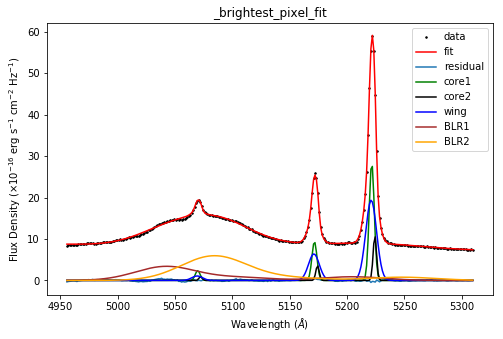

In [35]:
(amp_Hb_1,amp_OIII50071,vel_OIII1,vel_sigma_OIII1,amp_Hb_2,amp_OIII50072,vel_OIII2,vel_sigma_OIII2,amp_Hb_br,amp_OIII5007_br,vel_OIII_br,vel_sigma_OIII_br,amp_Hb1,amp_Fe5018_1,vel_Hb1,vel_sigma_Hb1,amp_Hb2,amp_Fe5018_2,vel_Hb2,vel_sigma_Hb2,m,c)=popt_full_fit

fig = plt.figure(figsize=(8,5))
model = full_gauss2(popt_full_fit,x,y,y_err)*(y_err)+y
residual = y - model


plt.plot(x,y,'ko',markersize=1.5,label='data')
plt.plot(x,model,'r',label='fit')
plt.plot(x,residual,label='residual')

plt.plot(x,Hb_O3_gauss(x,amp_Hb_1,amp_OIII50071,vel_OIII1,vel_sigma_OIII1),'-g',label='core1')
plt.plot(x,Hb_O3_gauss(x,amp_Hb_2,amp_OIII50072,vel_OIII2,vel_sigma_OIII2),'-k',label='core2')
plt.plot(x,Hb_O3_gauss(x,amp_Hb_br,amp_OIII5007_br,vel_OIII_br,vel_sigma_OIII_br),color ='blue',label='wing')
plt.plot(x,Hb_Fe_doublet_gauss(x,amp_Hb1,amp_Fe5018_1,vel_Hb1,vel_sigma_Hb1),color ='brown',label='BLR1')
plt.plot(x,Hb_Fe_doublet_gauss(x,amp_Hb2,amp_Fe5018_2,vel_Hb2,vel_sigma_Hb2),color='orange',label='BLR2')

#plt.plot(x,Hb_Fe_doublet_gauss(x,amp_Hb2,amp_Fe5018_2,vel_Hb2,vel_sigma_Hb2) + continuum(x,m,c),'-c',label='BLR2')
plt.title('_brightest_pixel_fit')
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel(r"Flux Density ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$) ")
plt.legend()
plt.show() 
        
#plt.legend()
plt.show()

In [25]:
Monte_Carlo_loops = 10
parameters_MC = np.zeros((len(popt_full_fit),Monte_Carlo_loops))

In [27]:
for l in range(Monte_Carlo_loops):
    iteration_data = np.random.normal(y,y_err) # modify the data every loop again within the error 
    popt_MC,pcov_MC = leastsq(full_gauss2,x0=popt_full_fit,args=(x,iteration_data,y_err),maxfev = 10000000)                                                    
    parameters_MC[:,l]=popt_MC

In [29]:
parameters_err = np.std(parameters_MC,1) # takes the standard deviation along the second access, i.e. along the MC run dimension
(amp_Hb_1_error,amp_OIII50071_error,vel_OIII1_error,vel_sigma_OIII1_error,amp_Hb_2_error,amp_OIII50072_error,vel_OIII2_error,vel_sigma_OIII2_error,amp_Hb_br_error,amp_OIII5007_br_error,vel_OIII_br_error,vel_sigma_OIII_br_error,amp_Hb1_error,amp_Fe5018_1_error,vel_Hb1_error,vel_sigma_Hb1_error,amp_Hb2_error,amp_Fe5018_2_error,vel_Hb2_error,vel_sigma_Hb2_error,m_error,c_error) = parameters_err

In [33]:
#Now we can store the results in a fits table. We need to setup a name index relation
column_names={'amp_Hb_1':0,'amp_OIII50071':1,'vel_OIII1':2,'vel_sigma_OIII1':3,'amp_Hb_2':4,'amp_OIII50072':5,'vel_OIII2':6,'vel_sigma_OIII2':7,'amp_Hb_br':8,'amp_OIII5007_br':9,'vel_OIII_br':10,
              'vel_sigma_OIII_br':11,'amp_Hb1':12,'amp_Fe5018_1':13,'vel_Hb1':14,'vel_sigma_Hb1':15,'amp_Hb2':16,
              'amp_Fe5018_2':17,'vel_Hb2':18,'vel_sigma_Hb2':19,'m':20,'c':21}
columns=[]
for key in column_names.keys():
    columns.append(fits.Column(name=key,format='E',array=[popt_full_fit[column_names[key]]]))
    columns.append(fits.Column(name=key+'_err',format='E',array=[parameters_err[column_names[key]]]))
coldefs = fits.ColDefs(columns)
hdu = fits.BinTableHDU.from_columns(coldefs)
hdu.writeto('HE0232-0900_central_fit3.fits',overwrite=True)